## Breakout 2 Tasks (20+min): 

1. Someone else share and take notes (who resides furthest from the Bahamas)
2. Solidify your question(s) of interest.
3. Determine the next tasks:	
    - What other data do you need?  How will this data be collected and combined?
    - What data cleaning and wrangling tasks are needed?
    - What other EDA is necessary?  What visuals should be included?
    - What is a goal for a first baseline model (Key: should be interpretable)? (Be sure to include the class of model and the variables involved.
     - What is a reasonable goal for a final model and product?
4. Determine how long each task should take.
5. Assign next tasks to group members.  Do not actual perform these tasks!

In [95]:
import pandas as pd
import sys
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures


In [137]:
movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [138]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [139]:
print(movies.dtypes)

quants = movies.columns[(movies.dtypes == "int64") | (movies.dtypes == "float64") ].values
quants = quants[quants!='id']

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object


In [140]:
pd.Series(np.append(quants,'year'))

0          budget
1      popularity
2         revenue
3         runtime
4    vote_average
5      vote_count
6            year
dtype: object

In [141]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['year'] = pd.DatetimeIndex(movies['release_date']).year
movies['month'] = pd.DatetimeIndex(movies['release_date']).month
movies['decade'] = ((movies['year']) // 10)*10

In [142]:
oldest = np.argmin(movies['release_date'])
newest = np.argmax(movies['release_date'])

print("Oldest Movie:" , movies['title'][oldest], " in", movies['release_date'][oldest])
print("Newest Movie:" , movies['title'][newest], " in", movies['release_date'][newest])


Oldest Movie: Intolerance  in 1916-09-04 00:00:00
Newest Movie: Growing Up Smith  in 2017-02-03 00:00:00


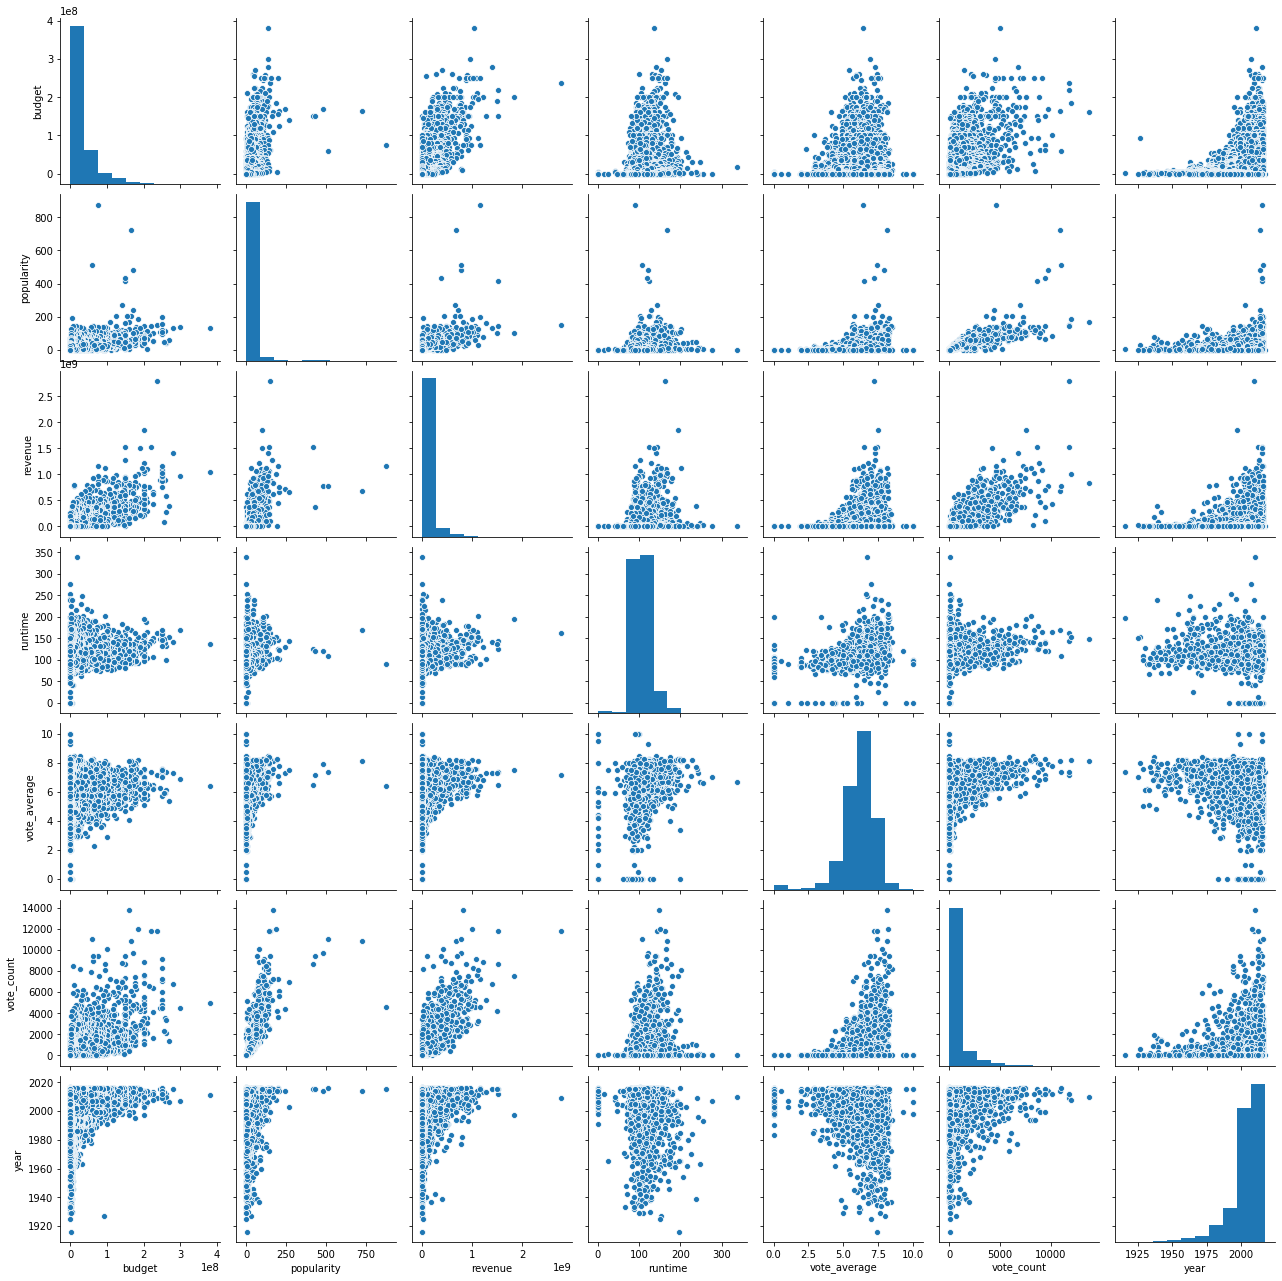

In [143]:
sns.pairplot(movies[np.append(quants,'year')]);

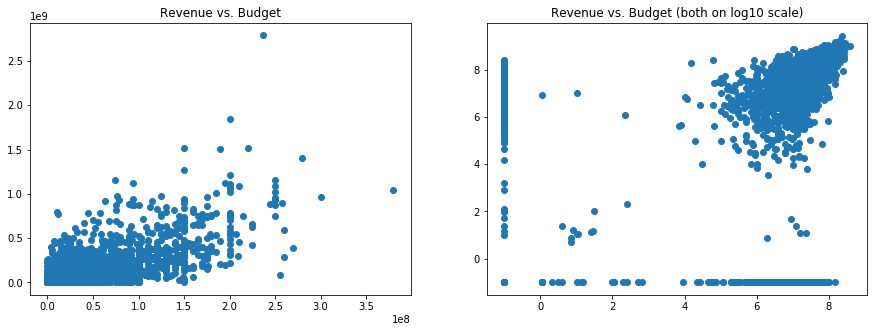

In [145]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(movies['budget'],movies['revenue'])
ax1.set_title("Revenue vs. Budget")

ax2.scatter(np.log10(movies['budget']+0.1),np.log10(movies['revenue']+0.1))
ax2.set_title("Revenue vs. Budget (both on log10 scale)")
plt.show()



In [146]:
print(np.sum(movies['runtime']==0))
movies[(movies['budget']<1000) | (movies['revenue']<1000 )][['revenue','budget']]

35


,revenue,budget
83,0,27000000
135,0,150000000
265,0,0
309,0,84000000
321,104907746,0
...,...,...
4797,0,0
4799,0,9000
4800,0,0
4801,0,0


In [147]:
movies_raw = movies.copy()

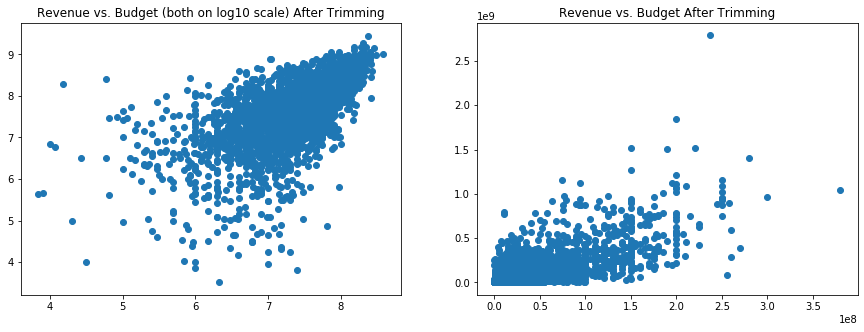

In [148]:
movies = movies[(movies['budget']>=1000) & (movies['revenue']>=1000 )]

movies['logbudget'] = np.log10(movies['budget'])
movies['logrevenue'] = np.log10(movies['revenue'])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(movies['logbudget'],movies['logrevenue'])
ax1.set_title("Revenue vs. Budget (both on log10 scale) After Trimming")

ax2.scatter(movies['budget'],movies['revenue'])
ax2.set_title("Revenue vs. Budget After Trimming")
plt.show()

In [149]:
ols1 = LinearRegression()
ols1.fit(movies[['logbudget']],movies['logrevenue'])

print(f"Estimated Linear Regression Coefficients: Intercept = {ols1.intercept_:.4f}, Slope(s) = {ols1.coef_[0]:.4f}")


Estimated Linear Regression Coefficients: Intercept = 1.6785, Slope(s) = 0.8125


In [150]:
ols2 = LinearRegression()
ols2.fit(movies[['logbudget','year']],movies['logrevenue'])

print(f"Estimated Linear Regression Coefficients: Intercept = {ols2.intercept_:.3f}, Slope(s) =", np.round(ols2.coef_,5))


Estimated Linear Regression Coefficients: Intercept = 14.954, Slope(s) = [ 0.86571 -0.00683]


In [157]:
poly = PolynomialFeatures(interaction_only=True,include_bias=False)
X_interact = poly.fit_transform(movies[['logbudget','year']])

In [159]:
ols3 = LinearRegression()
ols3.fit(X_interact ,movies['logrevenue'])

print(f"Estimated Linear Regression Coefficients: Intercept = {ols3.intercept_:.3f}, Slope(s) =", np.round(ols3.coef_,4))

Estimated Linear Regression Coefficients: Intercept = 161.257, Slope(s) = [-2.0854e+01 -7.9900e-02  1.0900e-02]
